In [128]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

## 1) Single Subject

**Check (and change) current working directory**

In [129]:
os.getcwd()
#os.listdir(os.getcwd())
#os.chdir(r"C:\Users\Steffi\Desktop\Semester 2\Practical Skills for Researchers\Data\Pilot2")

'C:\\Users\\Steffi\\Desktop\\Semester 2\\Practical Skills for Researchers\\Data\\Pilot2'

**Read data**

In [130]:
data = pd.read_csv("data_crowding_pp_03.csv",sep='\t')

**Show data**

In [131]:
data

,Unnamed: 0,RT,key_pressed,target_ecc,target_flank_ratio,target_orientation
0,0,0.474970,left,4.0,0.80,right
1,1,0.628738,right,4.0,0.80,right
2,2,0.490603,left,4.0,0.80,left
3,3,0.600119,right,8.0,0.80,right
4,4,0.500148,right,12.0,0.80,left
5,5,0.566943,left,12.0,0.80,left
6,6,0.516805,right,4.0,0.75,right
7,7,0.541792,left,8.0,0.80,left
8,8,0.491482,left,12.0,0.80,left
9,9,0.523910,left,12.0,0.75,left


**Plot data**

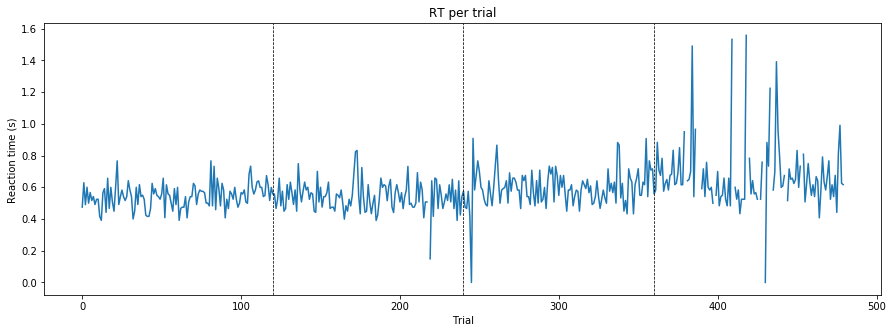

In [132]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.plot(data["RT"])
plt.ylabel("Reaction time (s) ")
plt.xlabel("Trial")
plt.title("RT per trial")
xposition = [120, 240, 360]
for xc in xposition:
    plt.axvline(x=xc, ls='--', c='k', lw=0.75)
plt.show()

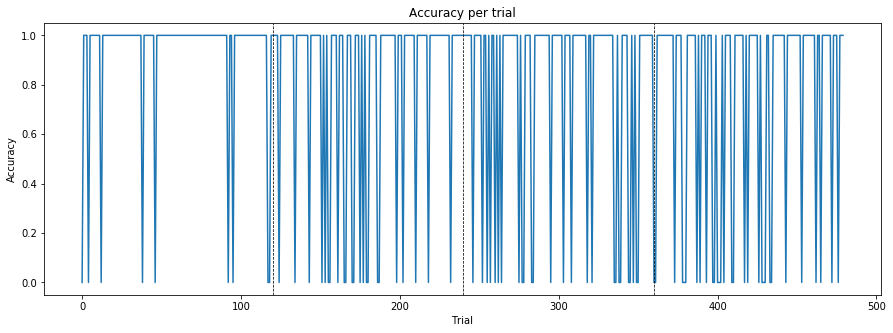

In [133]:
%matplotlib inline
accuracy = data['key_pressed']==data['target_orientation']
plt.figure(figsize=(15,5))
plt.plot(accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Trial")
plt.title("Accuracy per trial")
xposition = [120, 240, 360]
for xc in xposition:
    plt.axvline(x=xc, ls='--', c='k', lw=0.75)
plt.show()

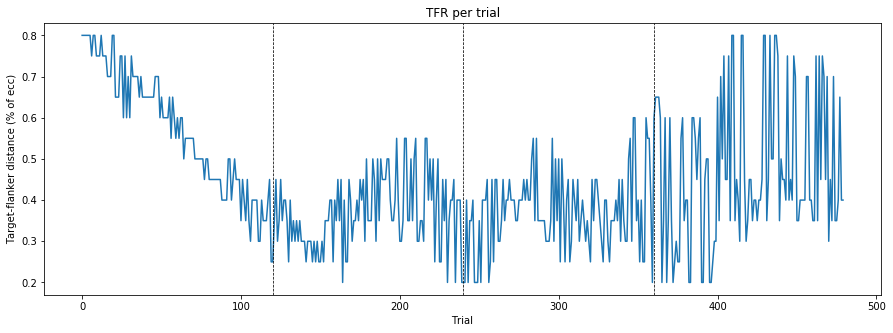

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,5))
plt.plot(data["target_flank_ratio"])
plt.ylabel("Target-flanker distance (% of ecc)")
plt.xlabel("Trial")
plt.title("TFR per trial")
xposition = [120, 240, 360]
for xc in xposition:
    plt.axvline(x=xc, ls='--', c='k', lw=0.75)
plt.show()

### Data analysis

In [135]:
accuracy = data['key_pressed']==data['target_orientation']
mean_accuracy = float(sum(accuracy))/float(len(accuracy))
print("Mean accuracy across trials:", mean_accuracy)

Mean accuracy across trials: 0.8145833333333333


**Data per eccentricity**

In [136]:
ecc = [4,8,12]
trials_per_ecc = len(data)/len(ecc)
acc_per_ecc = []
ratio_per_ecc = []

for e in ecc:
    ecc_acc = []
    ecc_ratio = []
    
    for i in range(len(data)):
        if data["target_ecc"][i]==e and data['key_pressed'][i]==data['target_orientation'][i]:
            ecc_acc.append(True)
            ecc_ratio.append(data['target_flank_ratio'][i])
        else:
            ecc_acc.append(False)
    
    acc_per_ecc.append(float(sum(ecc_acc))/trials_per_ecc)
    ratio_per_ecc.append(sum(ecc_ratio)/len(ecc_ratio))

print(acc_per_ecc)
print(ratio_per_ecc)

[0.81875, 0.7875, 0.8375]
[0.43816793893129763, 0.46865079365079415, 0.42201492537313445]


**Data per block**

In [165]:
blocks = 4
trials_per_block = len(data)/blocks
trials_per_block_per_ecc = trials_per_block/len(ecc)
block_separation=[0,120,240,360,480]

acc_ecc_block = np.zeros((blocks, len(ecc)))
ratio_ecc_block = np.zeros((blocks, len(ecc)))

for b in range(blocks):
    
    for e in range(len(ecc)):
        ecc_acc = []
        ecc_ratio = []

        for i in range(block_separation[b],block_separation[b+1]):
            if data["target_ecc"][i]==ecc[e] and data['key_pressed'][i]==data['target_orientation'][i]:
                ecc_acc.append(True)
                ecc_ratio.append(data['target_flank_ratio'][i])
            else:
                ecc_acc.append(False)
        
        acc_ecc_block[b,e]=(float(sum(ecc_acc))/trials_per_block_per_ecc)
        ratio_ecc_block[b,e]=(sum(ecc_ratio)/len(ecc_ratio))
        
print(acc_ecc_block)
print(ratio_ecc_block)

[[0.875 0.95  0.95 ]
 [0.9   0.7   0.825]
 [0.775 0.775 0.8  ]
 [0.725 0.725 0.775]]
[[0.58714286 0.57368421 0.54473684]
 [0.35833333 0.38928571 0.34848485]
 [0.35645161 0.38225806 0.3390625 ]
 [0.44482759 0.5        0.43548387]]


Text(0.5, 1.0, 'Accuracy per eccentricity')

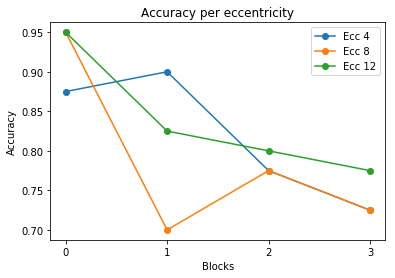

In [166]:
#Plot Accuracy
plt.figure
plt.plot(acc_ecc_block[:,0], marker='o')
plt.plot(acc_ecc_block[:,1], marker='o')
plt.plot(acc_ecc_block[:,2], marker='o')
plt.xlabel("Blocks")
plt.xticks(range(blocks))
plt.ylabel("Accuracy")
plt.legend(["Ecc 4", "Ecc 8", "Ecc 12"])
plt.title("Accuracy per eccentricity")

Text(0.5, 1.0, 'Target-Flanker-Ratio per eccentricity')

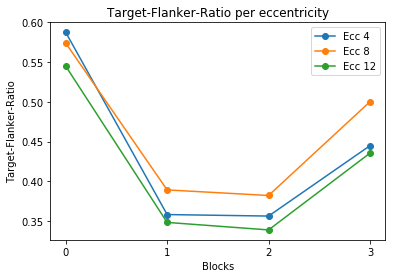

In [167]:
#Plot Target-flanker-ratio
plt.figure
plt.plot(ratio_ecc_block[:,0], marker='o')
plt.plot(ratio_ecc_block[:,1], marker='o')
plt.plot(ratio_ecc_block[:,2], marker='o')
plt.xlabel("Blocks")
plt.xticks(range(blocks))
plt.ylabel("Target-Flanker-Ratio")
plt.legend(["Ecc 4", "Ecc 8", "Ecc 12"])
plt.title("Target-Flanker-Ratio per eccentricity")

## 2) Group of Subjects

**Combine data of individual subjects**

In [140]:
#all_files = ["data_crowding_pp_01.csv","data_crowding_pp_02.csv","data_crowding_pp_03.csv","data_crowding_pp_ines.csv"]
all_files = ["data_crowding_pp_01.csv","data_crowding_pp_02.csv","data_crowding_pp_03.csv"]

subs = []    
for filename in all_files:
    a = pd.read_csv(filename, sep='\t')
    subs.append(a)
data_all = pd.concat(subs, ignore_index = True)

**Data per eccentricity**

In [141]:
ecc = [4,8,12]
acc_per_ecc = []
ratio_per_ecc = []

for e in ecc:
    ecc_acc = []
    ecc_ratio = []
    
    for i in range(len(data_all)):
        if data_all["target_ecc"][i]==e and data_all['key_pressed'][i]==data_all['target_orientation'][i]:
            ecc_acc.append(True)
            ecc_ratio.append(data_all['target_flank_ratio'][i])
        else:
            ecc_acc.append(False)
    
    acc_per_ecc.append(float(sum(ecc_acc))/(len(data_all)/len(ecc)))
    ratio_per_ecc.append(sum(ecc_ratio)/len(ecc_ratio))

print(acc_per_ecc)
print(ratio_per_ecc)

[0.6145833333333334, 0.5625, 0.6479166666666667]
[0.6320338983050843, 0.6385185185185166, 0.6294212218649514]


**Compare Reaction Times**

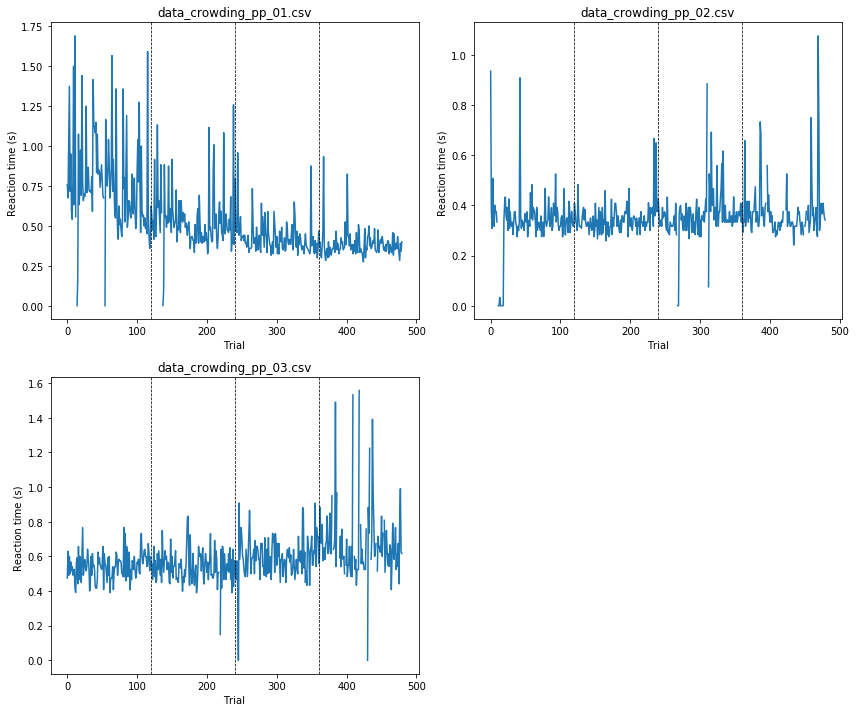

In [142]:
rows = (len(all_files)/2)+1
plt.figure(figsize=(12,rows*4))

for i in range(len(all_files)):
    data_sub = pd.read_csv(all_files[i], sep='\t')
    plt.subplot(rows,2,i+1)
    plt.plot(data_sub["RT"])
    plt.ylabel("Reaction time (s) ")
    plt.xlabel("Trial")
    plt.title(all_files[i])
    xposition = [120, 240, 360]
    for xc in xposition:
        plt.axvline(x=xc, ls='--', c='k', lw=0.75)
plt.tight_layout()

**Compare Target-Flanker-Ratio**

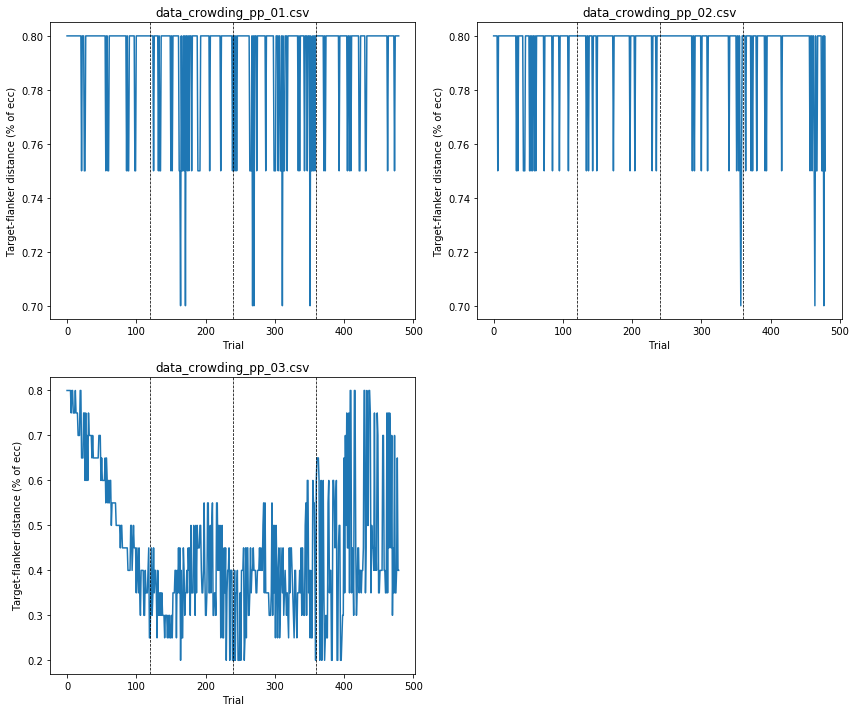

In [143]:
plt.figure(figsize=(12,rows*4))

for i in range(len(all_files)):
    data_sub = pd.read_csv(all_files[i], sep='\t')
    plt.subplot(rows,2,i+1)
    plt.plot(data_sub["target_flank_ratio"])
    plt.ylabel("Target-flanker distance (% of ecc)")
    plt.xlabel("Trial")
    plt.title(all_files[i])
    xposition = [120, 240, 360]
    for xc in xposition:
        plt.axvline(x=xc, ls='--', c='k', lw=0.75)
plt.tight_layout()

**Compare data per block**

In [175]:
blocks = 4
trials_per_block = len(data)/blocks
trials_per_block_per_ecc = trials_per_block/len(ecc)
block_separation=[0,120,240,360,480]

acc_ecc_block = np.zeros((blocks, len(ecc), len(all_files)))
ratio_ecc_block = np.zeros((blocks, len(ecc), len(all_files)))

for sub in range(len(all_files)):
    
    data_sub = pd.read_csv(all_files[sub], sep='\t')

    for b in range(blocks):
        
        for e in range(len(ecc)):
            ecc_acc = []
            ecc_ratio = []
            
            for i in range(block_separation[b],block_separation[b+1]):
                if data_sub["target_ecc"][i]==ecc[e] and data_sub['key_pressed'][i]==data_sub['target_orientation'][i]:
                    ecc_acc.append(True)
                    ecc_ratio.append(data_sub['target_flank_ratio'][i])
                else:
                    ecc_acc.append(False)
               
            acc_ecc_block[b,e,sub]=(float(sum(ecc_acc))/trials_per_block_per_ecc)
            ratio_ecc_block[b,e,sub]=(sum(ecc_ratio)/len(ecc_ratio))

**Compare Accuracy per block**

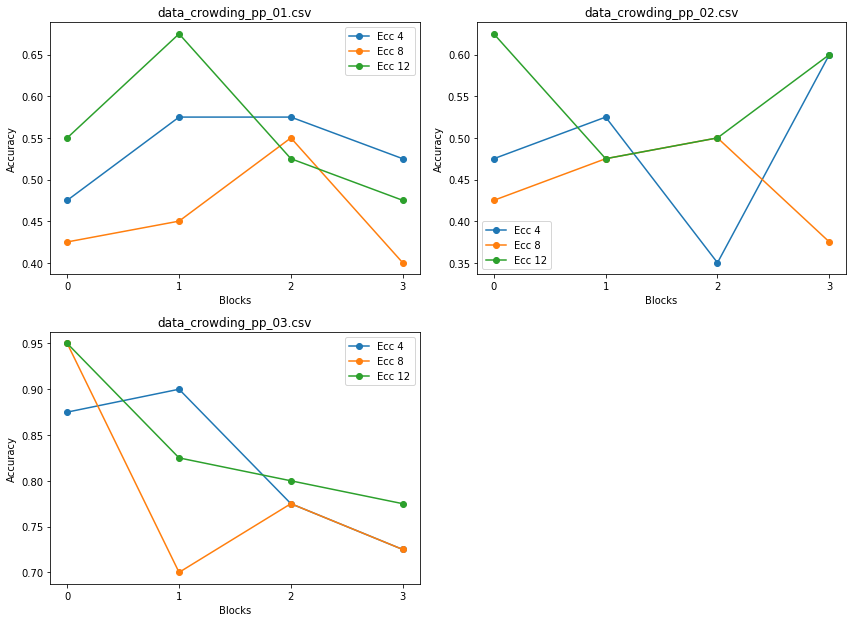

In [173]:
plt.figure(figsize=(12,rows*3.5))

for i in range(len(all_files)):
    plt.subplot(rows,2,i+1)
    plt.title(all_files[i])
    plt.plot(acc_ecc_block[:,0,i], marker='o')
    plt.plot(acc_ecc_block[:,1,i], marker='o')
    plt.plot(acc_ecc_block[:,2,i], marker='o')
    plt.xlabel("Blocks")
    plt.xticks(range(blocks))
    plt.ylabel("Accuracy")
    plt.legend(["Ecc 4", "Ecc 8", "Ecc 12"])
    
plt.tight_layout()

**Compare Target-Flanker-Ratio per block**

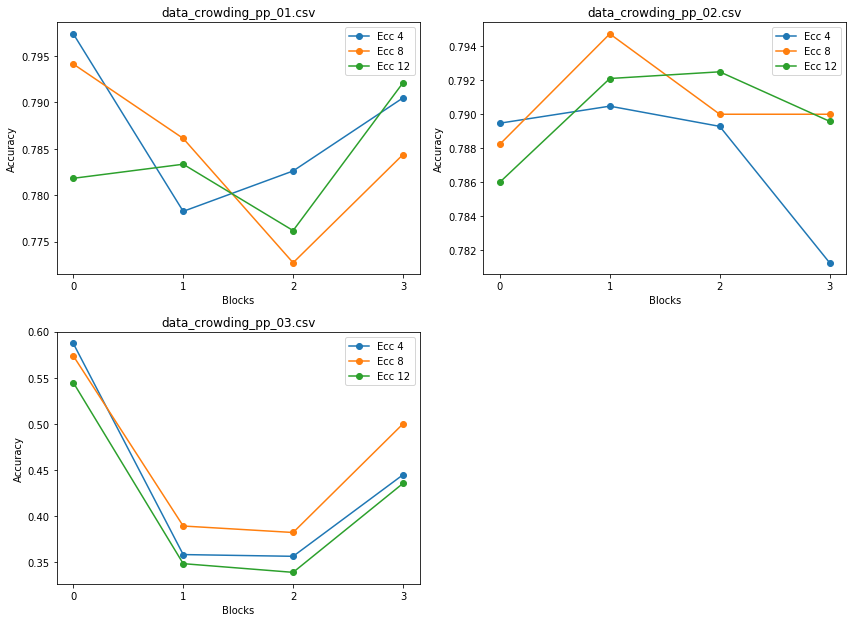

In [176]:
plt.figure(figsize=(12,rows*3.5))

for i in range(len(all_files)):
    plt.subplot(rows,2,i+1)
    plt.title(all_files[i])
    plt.plot(ratio_ecc_block[:,0,i], marker='o')
    plt.plot(ratio_ecc_block[:,1,i], marker='o')
    plt.plot(ratio_ecc_block[:,2,i], marker='o')
    plt.xlabel("Blocks")
    plt.xticks(range(blocks))
    plt.ylabel("Accuracy")
    plt.legend(["Ecc 4", "Ecc 8", "Ecc 12"])
    
plt.tight_layout()